In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib
import time

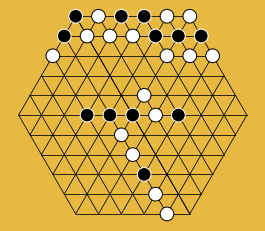

In [72]:
class Board:
    def __init__(self, layers=5, board=None):
        if not board:
            self.layers = layers
            self.board = [[0] * (2*layers+1) for _ in range(2*layers+1)]
            for i in range(layers+1, 2*layers+1):
                for j in range(i-layers):
                    self.board[i][j] = 10
                    self.board[j][i] = 10
        else:
            self.layers = int((len(board)-1)/2)
            self.board = board
    
    def get_board(self):
        return self.board

    # transform index of board into the location of stone in picture.
    # [i][j] -> (x, y) in picture
    def index_to_loc(self, i, j):
        # The unit length in picture
        unit_x = 1
        unit_y = np.sqrt(3)/2
        #unit_y = 1
        y = -i * unit_y
        if i <= self.layers:
            x = j * unit_x - 0.5 * i * unit_x
        else:
            x = (j - (i - self.layers)) * unit_x - 0.5 * (2*self.layers - i) * unit_x
        return x, y

    def plot_board(self):
        # Baisc setting
        figure, axes = plt.subplots(facecolor=(231/255,185/255,65/255))
        axes.axis('off')
        axes.set_aspect('equal')
        
        # draw the lines
        lines_row = []
        lines_col = []
        lines_dia = []
        for i in range(2*self.layers+1):
            if i <= self.layers:
                begin_i_index = i
                begin_j_index = 0
                end_i_index = i
                end_j_index = self.layers + i
            else:
                begin_i_index = i
                begin_j_index = i - self.layers
                end_i_index = i
                end_j_index = 2 * self.layers
            # draw row lines
            begin_x, begin_y = self.index_to_loc(begin_i_index, begin_j_index)
            end_x, end_y = self.index_to_loc(end_i_index, end_j_index)
            lines_row.append([[begin_x, end_x], [begin_y, end_y]])
            # draw col lines
            begin_x, begin_y = self.index_to_loc(begin_j_index, begin_i_index)
            end_x, end_y = self.index_to_loc(end_j_index, end_i_index)
            lines_col.append([[begin_x, end_x], [begin_y, end_y]])
            
        # draw diagonal lines
        for i in range(self.layers+1):
            begin_i_index = i
            begin_j_index = 0
            end_i_index = 2 * self.layers
            end_j_index = 2 * self.layers - i

            begin_x, begin_y = self.index_to_loc(begin_i_index, begin_j_index)
            end_x, end_y = self.index_to_loc(end_i_index, end_j_index)
            lines_dia.append([[begin_x, end_x], [begin_y, end_y]])

            begin_x, begin_y = self.index_to_loc(begin_j_index, begin_i_index)
            end_x, end_y = self.index_to_loc(end_j_index, end_i_index)
            lines_dia.append([[begin_x, end_x], [begin_y, end_y]])
        
        for lines in [lines_row, lines_col, lines_dia]:
            for x, y in lines:
                axes.plot(x, y, c='k', zorder=1, linewidth=0.8)

        # draw stones
        n = len(self.board)
        for i in range(n):
            for j in range(n):
                if np.abs(self.board[i][j]) == 1:
                    if self.board[i][j] == -1:
                        facecolor = "white"
                        edgecolor = "black"
                    else:
                        facecolor = "black"
                        edgecolor = "white"
                    x, y = self.index_to_loc(i, j)
                    circle = Circle((x, y), radius=0.3, facecolor=facecolor, edgecolor=edgecolor, zorder=2)
                    axes.add_artist(circle)
        
        plt.show()

board = [[1, -1, 1, 1, -1, -1, 10, 10, 10, 10, 10], 
         [1, -1, -1, -1, 1, 1, 1, 10, 10, 10, 10], 
         [-1, 0, 0, 0, 0, -1, -1, -1, 10, 10, 10], 
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10], 
         [0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 10], 
         [0, 0, 0, 1, 1, 1, -1, 1, 0, 0, 0], 
         [10, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0], 
         [10, 10, 0, 0, 0, 0, -1, 0, 0, 0, 0], 
         [10, 10, 10, 0, 0, 0, 0, 1, 0, 0, 0], 
         [10, 10, 10, 10, 0, 0, 0, 0, -1, 0, 0], 
         [10, 10, 10, 10, 10, 0, 0, 0, 0, -1, 0]] 

A = Board(board=board)
board_A = A.get_board()
A.plot_board()

In [73]:
def check(board):
    
    def check_one_direction(i, j, direction):
        # direction = (di, dj)
        # return the number of stones in one directions
        n = len(board)
        di, dj = direction
        color = board[i][j]
        i += di
        j += dj
        num_connected = 0
        while 0 <= i < n and 0 <= j < n and board[i][j] == color:
            num_connected += 1
            i += di
            j += dj
        return num_connected
    
    n = len(board)
    Flag_finish = True
    
    for i in range(n):
        for j in range(n):
            if board[i][j] == 0:
                Flag_finish = False
                continue
            if np.abs(board[i][j]) == 1:
                
                num_left = check_one_direction(i, j, (0, -1))
                num_right = check_one_direction(i, j, (0, 1))
                num_row = num_left + num_right + 1
                
                num_up = check_one_direction(i, j, (-1, 0))
                num_down = check_one_direction(i, j, (1, 0))
                num_col = num_up + num_down + 1
                
                num_up_left = check_one_direction(i, j, (-1, -1))
                num_down_right = check_one_direction(i, j, (1, 1))
                num_dia = num_up_left + num_down_right + 1
     
                if num_row==5 or num_col==5 or num_dia== 5:
                    print(num_row,num_col,num_dia)
                    return (board[i][j], True)
    if Flag_finish:
        return (0, True)
    else:
        return (0, False)

In [74]:
check(board)

(0, False)